In [30]:
from common import subsample
from data import transforms

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib notebook

In [9]:
_dir = "/mnt/pccfs/not_backed_up/andrew_open/mri_data/"

train_dir = _dir + "singlecoil_train/"
test_dir = _dir + "singlecoil_test/"
val_dir = _dir + "singlecoil_val/"

In [116]:
for filename in os.listdir(train_dir):
    f = h5py.File(train_dir + filename, 'r')
    print(filename)
    break

file1001587.h5


In [11]:
list(f.keys())

['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']

In [12]:
def slice_and_dice(kspace):
    a = np.abs(np.fft.ifft2(kspace))
    b = np.vstack((a[len(a)//2:], a[:len(a)//2]))
    return np.hstack((b[:,b.shape[1]//2:], b[:,:b.shape[1]//2]))

In [25]:
m = mask(f['kspace'].shape)

In [93]:
mask = subsample.MaskFunc([0.08, 0.04],[4, 8])

In [87]:
data, m = transforms.apply_mask(transforms.to_tensor(f['kspace'][31]), mask)

<IPython.core.display.Javascript object>


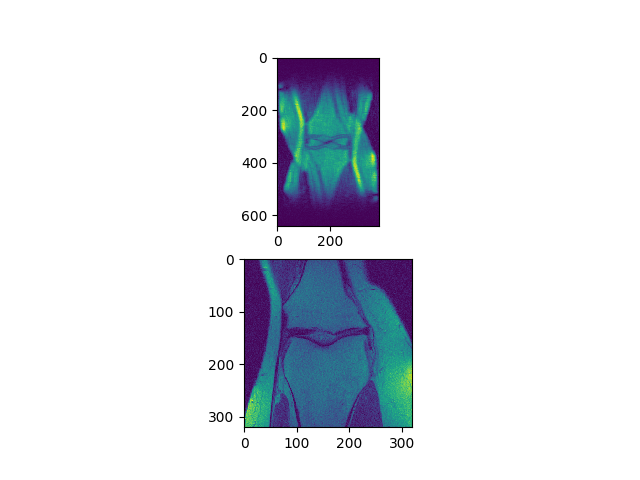

In [117]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(2,1)

def update(i):
    data, m = transforms.apply_mask(transforms.to_tensor(f['kspace'][i]), mask)
    ax[0].imshow(slice_and_dice(data[:,:,0]))
    ax[1].imshow(f['reconstruction_esc'][i])
    


anim = FuncAnimation(fig, update, frames=np.arange(0, 20), interval=50)
# anim.save('mri.gif', dpi=80, writer='imagemagick')
plt.show()

In [113]:
data[:,:,0].shape

torch.Size([640, 388])

<IPython.core.display.Javascript object>


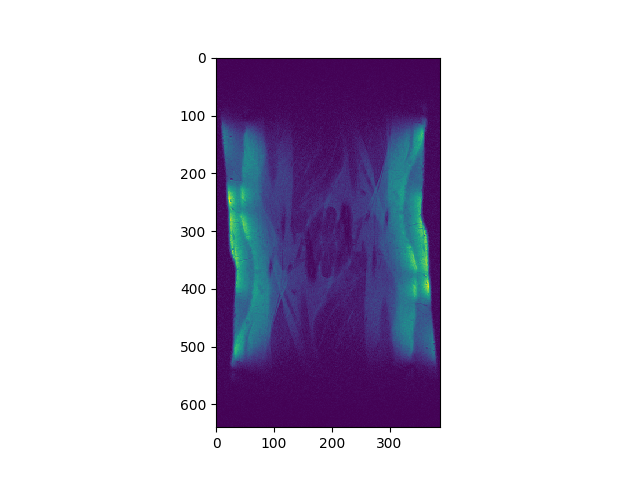

In [88]:
plt.imshow(slice_and_dice(data[:,:,0] + data[:,:,1]))
plt.show()

In [14]:
f['kspace']

<HDF5 dataset "kspace": shape (33, 640, 388), type "<c8">

In [61]:
a = data[:,:,0] + data[:,:,1]
b = transforms.to_tensor(f['kspace'][31])
c = b[:,:,0] + b[:,:,1]

In [65]:
m = a == c

In [79]:
np.where(data > 0)

(array([  0,   0,   0, ..., 639, 639, 639]),
 array([ 19,  20,  21, ..., 367, 367, 368]),
 array([1, 0, 0, ..., 0, 1, 0]))

In [60]:
b.shape

torch.Size([640, 388, 2])

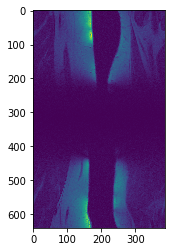

In [7]:
d = slice_and_dice(f['kspace'][31])
plt.imshow(np.abs(np.fft.ifft2(f['kspace'][31])))
# plt.imshow(d)
plt.show()

In [33]:
b[:,:194].shape

(640, 194)

In [17]:
388/2

194.0